# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
celsius_metric = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units={celsius_metric}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castillos
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | marka
Processing Record 4 of Set 1 | manpur
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | pangody
Processing Record 7 of Set 1 | punta del este
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | tell city
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | riohacha
Processing Record 15 of Set 1 | duyun
Processing Record 16 of Set 1 | camiri
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | paramonga
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | udachny
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castillos,-34.1667,-53.8333,16.91,67,15,2.56,UY,1696274915
1,adamstown,-25.0660,-130.1015,20.03,75,61,11.32,PN,1696274916
2,marka,1.7159,44.7717,25.97,86,2,6.18,SO,1696274916
3,manpur,22.4333,75.6167,20.94,70,100,3.06,IN,1696274916
4,iskateley,67.6803,53.1512,3.90,78,90,9.39,RU,1696274917


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castillos,-34.1667,-53.8333,16.91,67,15,2.56,UY,1696274915
1,adamstown,-25.0660,-130.1015,20.03,75,61,11.32,PN,1696274916
2,marka,1.7159,44.7717,25.97,86,2,6.18,SO,1696274916
3,manpur,22.4333,75.6167,20.94,70,100,3.06,IN,1696274916
4,iskateley,67.6803,53.1512,3.90,78,90,9.39,RU,1696274917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

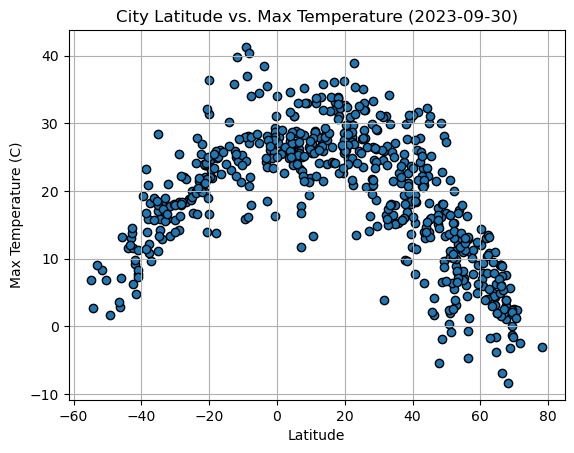

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

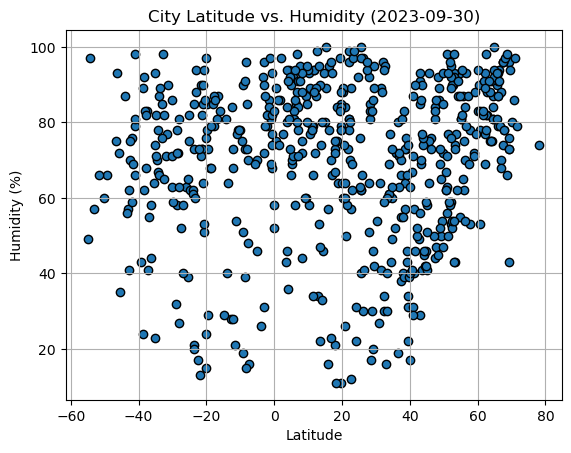

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

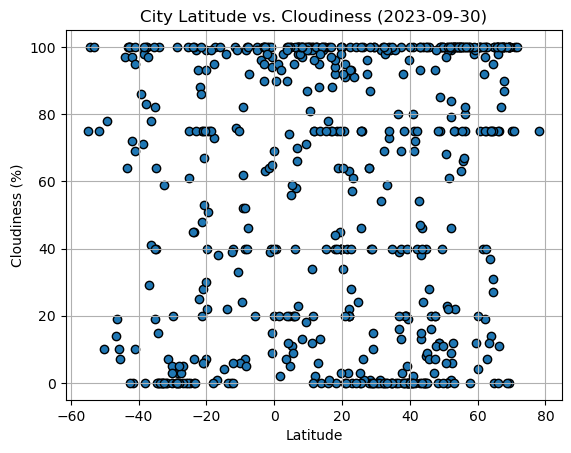

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

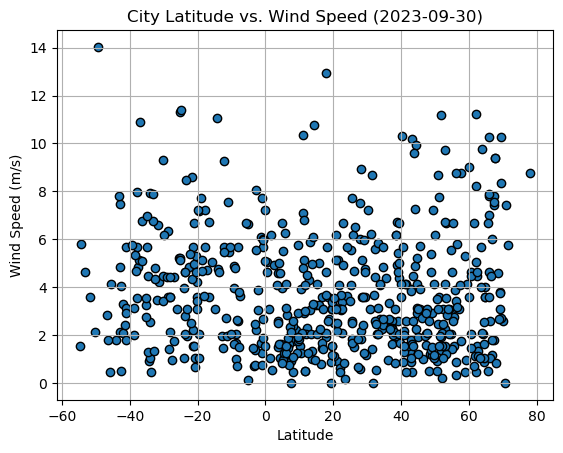

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,marka,1.7159,44.7717,25.97,86,2,6.18,SO,1696274916
3,manpur,22.4333,75.6167,20.94,70,100,3.06,IN,1696274916
4,iskateley,67.6803,53.1512,3.90,78,90,9.39,RU,1696274917
5,pangody,65.8500,74.4859,9.07,90,100,7.01,RU,1696274917
7,longyearbyen,78.2186,15.6401,-3.09,74,75,8.75,SJ,1696274918


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castillos,-34.1667,-53.8333,16.91,67,15,2.56,UY,1696274915
1,adamstown,-25.0660,-130.1015,20.03,75,61,11.32,PN,1696274916
6,punta del este,-34.9667,-54.9500,17.06,82,40,5.66,UY,1696274917
10,waitangi,-43.9535,-176.5597,11.57,87,97,1.79,NZ,1696274919
12,hermanus,-34.4187,19.2345,15.90,78,0,0.90,ZA,1696274919


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.63533862136162


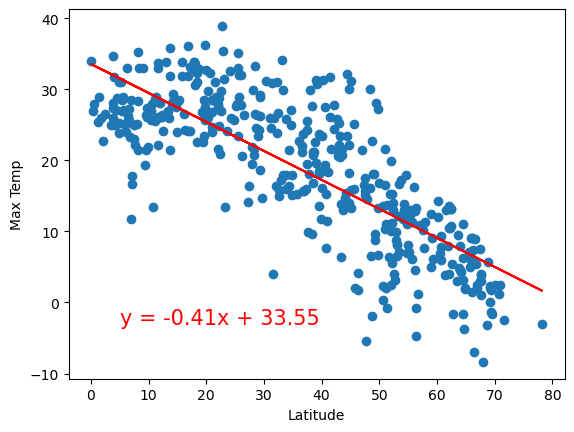

In [23]:
# Linear regression on Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_temp_north = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_temp_north)
reg_temp_north = intercept + slope * x_lat_north
line_temp_north = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_temp_north)
plt.plot(x_lat_north,reg_temp_north,"r")
plt.annotate(line_temp_north,(5,-3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.6062127849674303


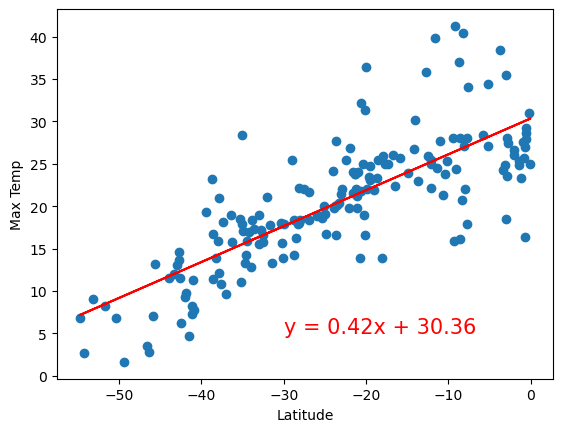

In [24]:
# Linear regression on Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_temp_south = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_temp_south)
reg_temp_south = intercept + slope * x_lat_south
line_temp_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_temp_south)
plt.plot(x_lat_south,reg_temp_south,"r")
plt.annotate(line_temp_south,(-30,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The maximum temperatures along the latitude and their relationship in this data suggest that the maximum temperature increases as it approaches a latitude value of 0 - the equator - and decreases as latitude increases in positive value. We can weakly conclude, with the linear regression models for both the northern and southern hemisphere, that the maximum temperature increases as latitude approaches 0, regardless of direction.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.005527200099953663


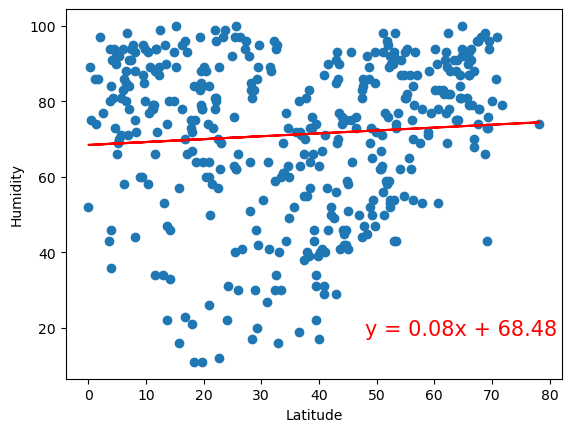

In [17]:
# Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_hum_north = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_hum_north)
reg_hum_north = intercept + slope * x_lat_north
line_hum_north = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_hum_north)
plt.plot(x_lat_north,reg_hum_north,"r")
plt.annotate(line_hum_north,(48,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.0006429327652753143


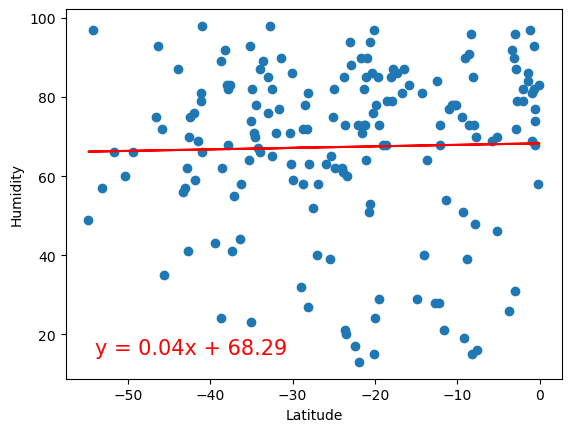

In [18]:
# Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_hum_south = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_hum_south)
reg_hum_south = intercept + slope * x_lat_south
line_hum_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_hum_south)
plt.plot(x_lat_south,reg_hum_south,"r")
plt.annotate(line_hum_south,(-54,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The linear relatioship between latitude and humidity is statistically insignificant for both hemispheres, as the regression line is similar, regardless of the latitude value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.004604134015876814


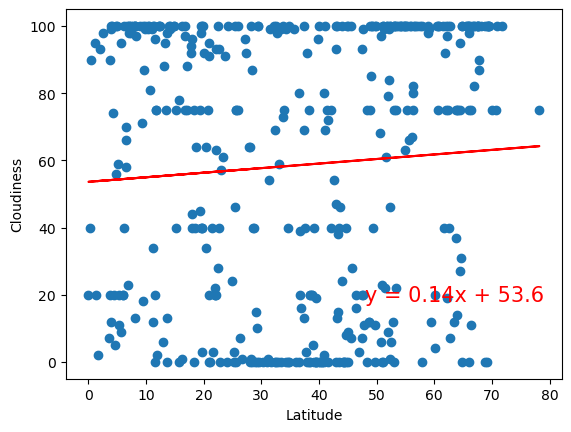

In [19]:
# Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_cloud_north = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloud_north)
reg_cloud_north = intercept + slope * x_lat_north
line_cloud_north = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_cloud_north)
plt.plot(x_lat_north,reg_cloud_north,"r")
plt.annotate(line_cloud_north,(48,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.011981514483646597


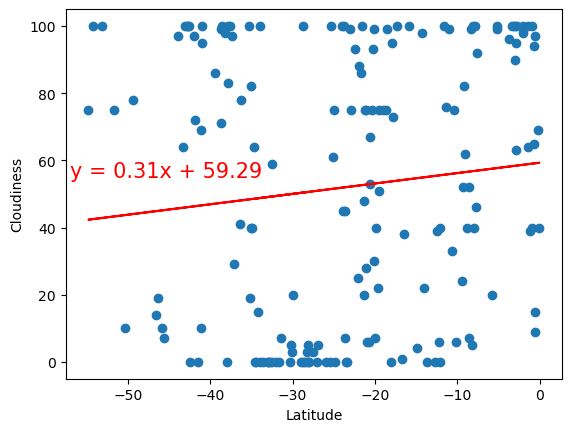

In [25]:
# Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_cloud_south = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloud_south)
reg_cloud_south = intercept + slope * x_lat_south
line_cloud_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_cloud_south)
plt.plot(x_lat_south,reg_cloud_south,"r")
plt.annotate(line_cloud_south,(-57,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** By comparing the linear relationships for the northern and southern hemispheres between latitude and cloudiness, we can weakly conclude that cloudiness increases at a higher rate when approaching the equator from the negative latitude value than when straying away from the equator in a positive latitude value. The relationship is statistically stronger in the southern hemisphere, but there are no clear and direct conclusions to draw.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.02267137126775341


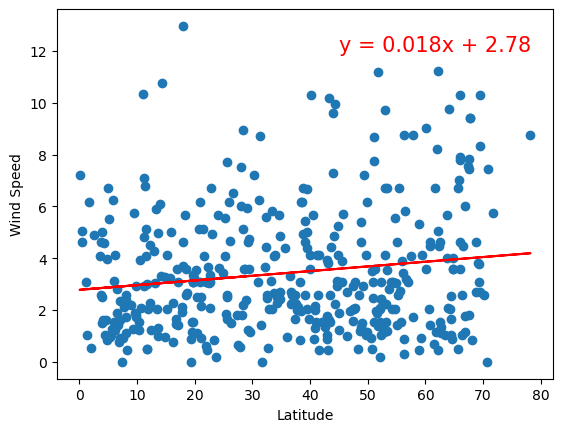

In [21]:
# Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_wind_north = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_wind_north)
reg_wind_north = intercept + slope * x_lat_north
line_wind_north = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_wind_north)
plt.plot(x_lat_north,reg_wind_north,"r")
plt.annotate(line_wind_north,(45,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.006318285357698636


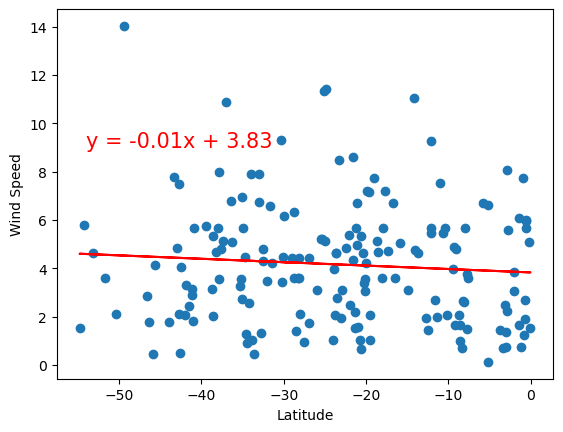

In [22]:
# Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_wind_south = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_wind_south)
reg_wind_south = intercept + slope * x_lat_south
line_wind_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_wind_south)
plt.plot(x_lat_south,reg_wind_south,"r")
plt.annotate(line_wind_south,(-54,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind speeds weakly decrease toward the equator from the negative latitude values, but has a statistically insignificant relationship in the northern hemisphere. Although the r-squared value is relatively higher in the northern hemisphere, we cannot be confident in our conclusions, as only 0.63% of the variability observed in wind speeds in the southern hemisphere is explained by the regression model.